# Predicting whether a tissue sample is a tumor or normal from miRNA expression data using SVM

## Import modules and data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
data = pd.read_csv("cervical.csv")

data

,ID,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,let-7a,865,810,5505,6692,1456,588,9,4513,1962,...,37,3174,116,1722,68,12121,14398,39196,198,1422
1,let-7a*,3,12,30,73,6,2,0,199,10,...,0,648,4,212,6,2,80,164,18,1
2,let-7b,975,2790,4912,24286,1759,508,33,6162,1455,...,99,102358,184,28274,401,14471,24097,73139,669,2492
3,let-7b*,15,18,27,119,11,3,0,116,17,...,0,334,1,189,5,34,115,230,4,15
4,let-7c,828,1251,2973,6413,713,339,23,2002,476,...,34,1711,22,3127,199,3186,1454,5883,167,321
5,let-7c*,0,0,0,1,0,0,0,3,0,...,0,4,0,2,0,0,1,1,0,0
6,let-7d,71,98,364,1890,188,47,1,719,204,...,1,2909,6,2360,3,529,2849,4937,21,154
7,let-7d*,3,24,8,41,8,2,0,38,18,...,0,95,4,35,21,14,26,18,2,0
8,let-7e,169,151,788,5801,308,121,9,1912,204,...,172,10326,312,812,38,4250,942,2388,69,25
9,let-7e*,0,1,1,7,1,0,0,14,1,...,0,53,2,2,0,1,2,7,0,0


In [50]:
print(data.shape)

(714, 59)


In [51]:
sizes = data.sum(numeric_only=True)
sizes

N1       22449
N2       39798
N3       71717
N4      221520
N5       52881
N6        9147
N7        1322
N8      124946
N9       37309
N10     150880
N11     104645
N12     273996
N13     240104
N14     505801
N15      12233
N16     505996
N17     857896
N18     736439
N19     855673
N20     433885
N21     585126
N22     608351
N23     108018
N24      92593
N25      15254
N26    1197092
N27     215706
N28      72381
N29       8034
T1       58362
T2      431247
T3       84850
T4       26146
T5       94748
T6        7043
T7       76576
T8        1626
T9       61955
T10      36632
T11      14165
T12     242835
T13      24919
T14    1174900
T15      67742
T16      10311
T17     184963
T18      21385
T19     451908
T20       3103
T21    1227057
T22       3515
T23     233536
T24       7696
T25     157595
T26     271727
T27     540323
T28       6753
T29      16338
dtype: int64

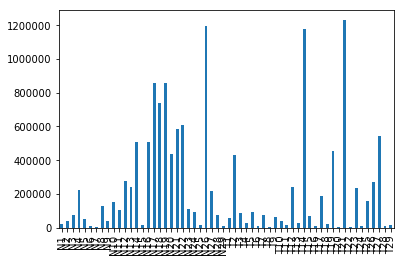

In [52]:
sizes.plot.bar()

In [53]:
ID = data.ID
data = data.drop('ID', 1)
sums = data.sum()
cpm = (data.div(sums))*1000000
cpm.insert(loc=0, column='ID', value=ID)

In [54]:
cpm

,ID,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,let-7a,38531.783153,20352.781547,76760.042947,30209.461900,27533.518655,64283.371597,6807.866868,36119.603669,52587.847436,...,11923.944570,2586.676903,33001.422475,7373.595506,8835.758836,76912.338589,52987.005340,72541.794445,29320.302088,87036.356959
1,let-7a*,133.636242,301.522690,418.310861,329.541351,113.462302,218.650924,0.000000,1592.688041,268.031842,...,0.000000,528.092827,1137.980085,907.782954,779.625780,12.690758,294.413143,303.522152,2665.482008,61.207002
2,let-7b,43431.778698,70104.025328,68491.431599,109633.441676,33263.364914,55537.334645,24962.178517,49317.305076,38998.633038,...,31904.608443,83417.477754,52347.083926,121069.128528,52104.989605,91823.979187,88680.918716,135361.626286,99067.081297,152527.849186
3,let-7b*,668.181211,452.284034,376.479775,537.197544,208.014221,327.976386,0.000000,928.401069,455.654132,...,0.000000,272.195994,284.495021,809.297068,649.688150,215.742885,423.218892,425.671311,592.329335,918.105031
4,let-7c,36883.602833,31433.740389,41454.606300,28949.981943,13483.103572,37061.331584,17397.881997,16022.921902,12758.315688,...,10957.138253,1394.393251,6258.890469,13389.798575,25857.588358,20216.377423,5350.958867,10887.931848,24729.749741,19647.447668
5,let-7c*,0.000000,0.000000,0.000000,4.514265,0.000000,0.000000,0.000000,24.010372,0.000000,...,0.000000,3.259832,0.000000,8.563990,0.000000,0.000000,3.680164,1.850745,0.000000,0.000000
6,let-7d,3162.724398,2462.435298,5075.505110,8531.960997,3555.152134,5138.296709,756.429652,5754.485938,5467.849581,...,322.268772,2370.713015,1706.970128,10105.508358,389.812890,3356.705479,10484.788041,9137.127237,3109.729009,9425.878320
7,let-7d*,133.636242,603.045379,111.549563,185.084868,151.283070,218.650924,0.000000,304.131385,482.457316,...,0.000000,77.421016,1137.980085,149.869827,2728.690229,88.835306,95.684271,33.313407,296.164668,0.000000
8,let-7e,7528.174974,3794.160511,10987.631942,26187.251715,5824.398177,13228.380890,6807.866868,15302.610728,5467.849581,...,55430.228811,8415.256993,88762.446657,3476.979995,4937.629938,26967.860655,3466.714754,4419.578659,10217.681031,1530.175052
9,let-7e*,0.000000,25.126891,13.943695,31.599856,18.910384,0.000000,0.000000,112.048405,26.803184,...,0.000000,43.192778,568.990043,8.563990,0.000000,6.345379,7.360329,12.955214,0.000000,0.000000


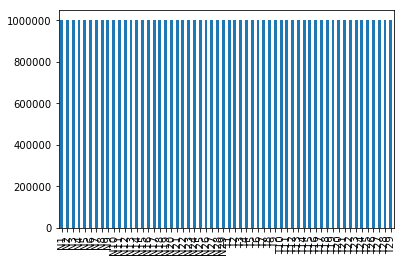

In [55]:
sizes = cpm.sum(numeric_only=True)
sizes.plot.bar()

In [56]:
cpm = cpm.transpose()
mirnas = cpm.iloc[0]
cpm = np.array(cpm.iloc[1:])
cpm

array([[38531.78315292441, 133.63624214887076, 43431.778698383, ..., 0.0,
        0.0, 44.54541404962359],
       [20352.7815468114, 301.5226895823911, 70104.02532790593, ...,
        25.12689079853259, 50.25378159706518, 0.0],
       [76760.0429465817, 418.3108607443144, 68491.43159920242, ..., 0.0,
        0.0, 27.88739071628763],
       ..., 
       [72541.79444517446, 303.5221524902697, 135361.626286499, ...,
        7.402979329030968, 12.955213825804195, 12.955213825804195],
       [29320.302087960907, 2665.482007996446, 99067.08129720124, ..., 0.0,
        0.0, 0.0],
       [87036.35695923613, 61.20700208103807, 152527.84918594686, ..., 0.0,
        0.0, 0.0]], dtype=object)

In [57]:
class_labels = np.array(['normal']*29 + ['tumor']*29)
class_labels

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'tumor', 'tumor', 'tumor', 'tumor', 'tumor', 'tumor'],
      dtype='<U6')

In [58]:
from sklearn.preprocessing import StandardScaler

sc_cpm = StandardScaler()

sc_cpm = sc_cpm.fit(cpm)

cpm = sc_cpm.transform(cpm)
#sc_cpm.fit_transform(cpm)


/Users/marco/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [59]:
from sklearn import svm
#from sklearn.svm import SVC

In [60]:
svc = svm.SVC(kernel='linear', random_state=12421412)
#SVC()


In [61]:
svc.fit(cpm, class_labels)
svc.score(cpm, class_labels)

1.0

In [62]:
svc = svm.SVC(kernel='linear', random_state=12421412)
import random
test = cpm[:10]
train = cpm[10:]

svc.fit(train, class_labels[10:])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12421412, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
svc.predict(test)

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal'],
      dtype='<U6')